# Unsupervised learning: seeking representations of the data


## Clustering: grouping observations together
clustering task: split the observations into well-separated group called clusters.

In [2]:
import numpy as np
np.random.seed(1)

## K-means Clustering

There exist a lot of different clustering criteria. The simplest form is k-means

In [3]:
from sklearn import cluster, datasets
X_iris, y_iris = datasets.load_iris(return_X_y=True)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 2 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


We might not recover the expected labels either because the chosen number of clusters was too large, or suffer from bad initialization.

### Applied example: vector quantization
Clustering can be seen as choosing a small number of exemplars to compress the information. this is known as "[[vector quantization]]" 

In [4]:
import scipy as sp

# Interesante que utilice try y except para importar la imagen, es buen manejo de errores
try:
    face = sp.face(gray=True) # get racoon face
except AttributeError: 
    from scipy import misc # import misc, which includes the face
    face = misc.face(gray=True) # Load gray scale image

X = face.reshape((-1, 1)) # reshape the face. Each row is a pixel
k_means = cluster.KMeans(n_clusters=5, n_init=1) # Create a cluster object
k_means.fit(X) # Fit the data

# Extract the centers of the clusters and flatten if needed. 
# each value represents the average intensity of the pixels in the cluster
values = k_means.cluster_centers_.squeeze() 
labels = k_means.labels_ # Get the labels of the clusters
# Create the compressed image. Each pixel is replaced with the value of the cluster center
face_compressed = np.choose(labels, values) 
face_compressed.shape = face.shape # reshape the compressed face to the original shape


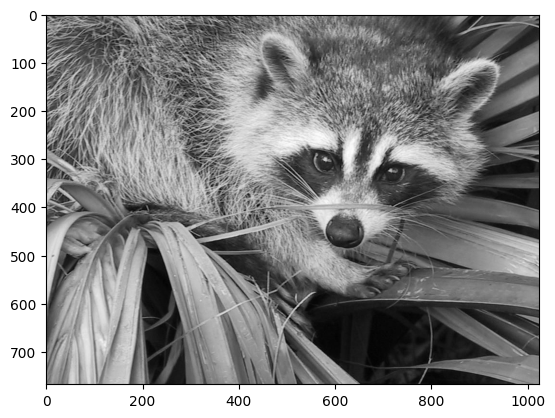

In [5]:
import matplotlib.pyplot as plt; plt.imshow(face, cmap='gray'); plt.show()



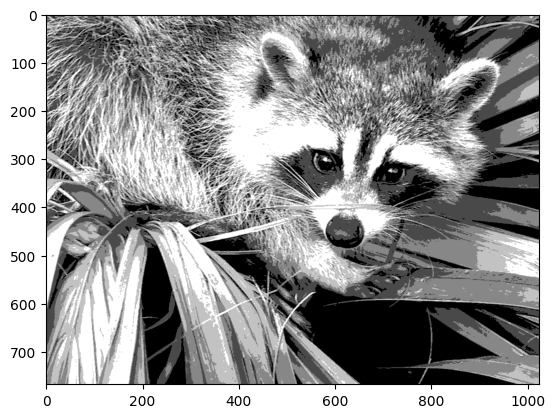

In [6]:
plt.imshow(face_compressed, cmap='gray'); plt.show()
